# Desafio DIO de Projeto 
### Treinamento de Redes Neurais com Transfer Learning
Aluna: Mirian Ajiki Molicawa
Data: 06/11/2022


Rede neural capaz de classificar corretamente gatos e cachorros
0-cat  / 1-dog
Dividem-se entre as camadas:
* Input Layer
* Hidden Layer
* Output Layer 
* Deep Learning

As entradas geralmente são chamadas de features, que serão as imagens de gatos e cachorros.
As saídas são chamadas de labels, que será a classificação 0 cat e 1 dog.
E a combinação de uma feature com a labels é chamada de exemplo (sample)
Como já estão definidas as categorias estas é chamada de aprendizado supervisionado.
Se houver desconhecimento das labels, seria chamada de aprendizado não supervisionado. 

Implementação do modelo 
* TensorFlow plataforma open source utilizada para modelos de machine learning
* Keras - biblioteca open source que o TensorFlow utiliza como API Application Programming Interface de alto nível para criação, treinamento e avaliação de redes neurais profundas.

In [1]:
# ! comando a nível do sistema operacional compactado

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2022-11-06 23:39:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 108.177.11.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   202MB/s    in 0.3s    

2022-11-06 23:39:00 (202 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# descompactação do arquivo
!unzip cats_and_dogs_filtered.zip


Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [ ]:
#Removendo os arquivos
!rm -rf cats_and_dogs_filtered.zip

In [ ]:
#Instalação da biblioteca do TensorFlow
!pip install Tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Instalação de bibliotecas: sistema operacional (definir diretórios), plotar gráficos e imagens e tensorflow para o modelo.
import os
import matplotlib.pyplot as plt
import tensorflow as tf



In [4]:
#Declaração de variáveis que guarda os diretórios dos datasets e mostra a  quantidade das imagens em cada pasta 
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir,'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.path.join(dataset_validation_dir, 'cats'))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print ('Train Cats: %s' % dataset_train_cats_len)
print ('Train Dogs: %s' % dataset_train_dogs_len)
print ('Validation Cats %s:' % dataset_validation_cats_len)
print ('Validation Dogs %s :' % dataset_validation_dogs_len)






Train Cats: 1000
Train Dogs: 1000
Validation Cats 47:
Validation Dogs 500 :


In [5]:
#Configuração das imagens, pois não conseguimos trabalhar com binário - Tamanho da imagem 160x160, valor cor como hexadecimal

image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size =  255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

#Configuração das variáveis para o treinamento, 32 é a quantidade de features que traz do dataset, 
#20 será o número de vezes que vai passar no data set inteiro, taxa de aprendizagem 0.0001 e string cat (0) ou dog (1) como saída

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['cat', 'dog']



In [6]:
#Criação dos objetos datasets
dataset_train = tf.keras.preprocessing.image_dataset_from_directory (
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)


Found 2000 files belonging to 2 classes.


In [7]:
#Criação do dataset de validação
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
dataset_validation_dir,
image_size = image_size,
batch_size = batch_size,
shuffle = True
)


Found 1000 files belonging to 2 classes.


In [8]:
#Criação do dataset para Teste com 500 amostras do dataset de validação, o método de cardinalidade traz o tamanho.
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print ('Validation Dataset Cardinality: % d' % tf.data.experimental.cardinality(dataset_validation))
print ('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))




Validation Dataset Cardinality:  26
Test Dataset Cardinality: 6


In [9]:
# 5 x 32 features (teste do modelo final )
# cardinalidade final de 21 (validacao do modelo)
# validação 1000 features dividido por 32 (atualiza os parâmetros da rede neural)
1000/32

31.25

In [10]:
#Criação de função para plotar as imagens
def plot_dataset(dataset):
  plt.gcf().clear()
  plt.figure(figsize = (15,15))

  for features, labels in dataset.take(1):
    for i in range(9):
      plt.subplot(3,3,i+1)
      plt.axis('off')

      plt.imshow(features[i].numpy().astype('uint8'))
      plt.title(class_names[labels[i]])
      


<Figure size 432x288 with 0 Axes>

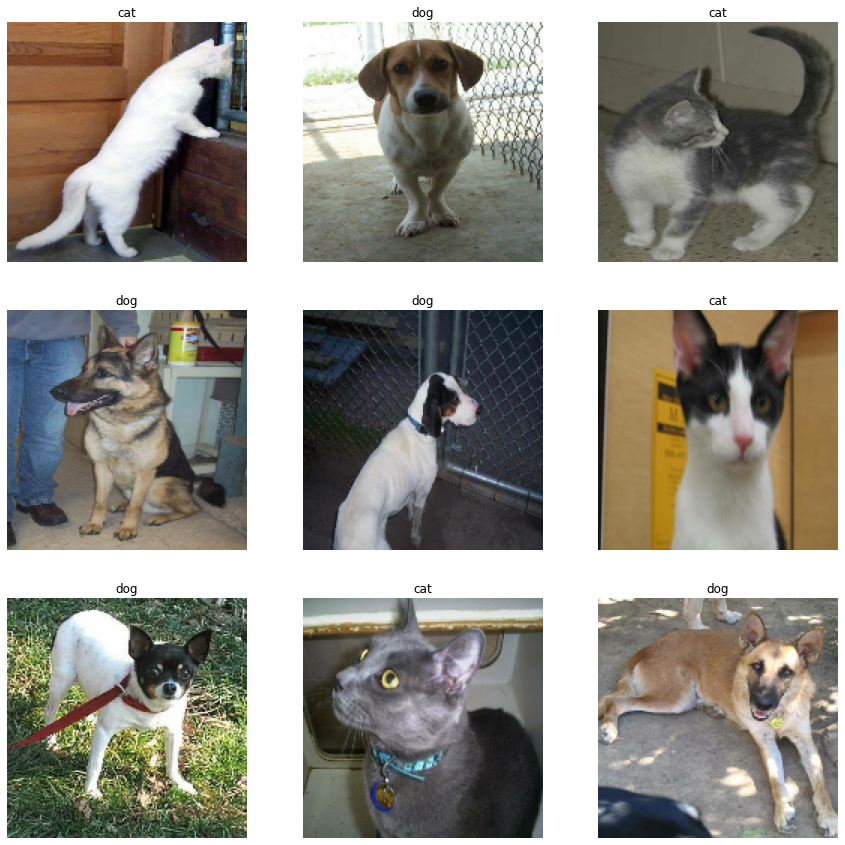

In [12]:
#Mostra as imagens do data set train
plot_dataset(dataset_train)


<Figure size 432x288 with 0 Axes>

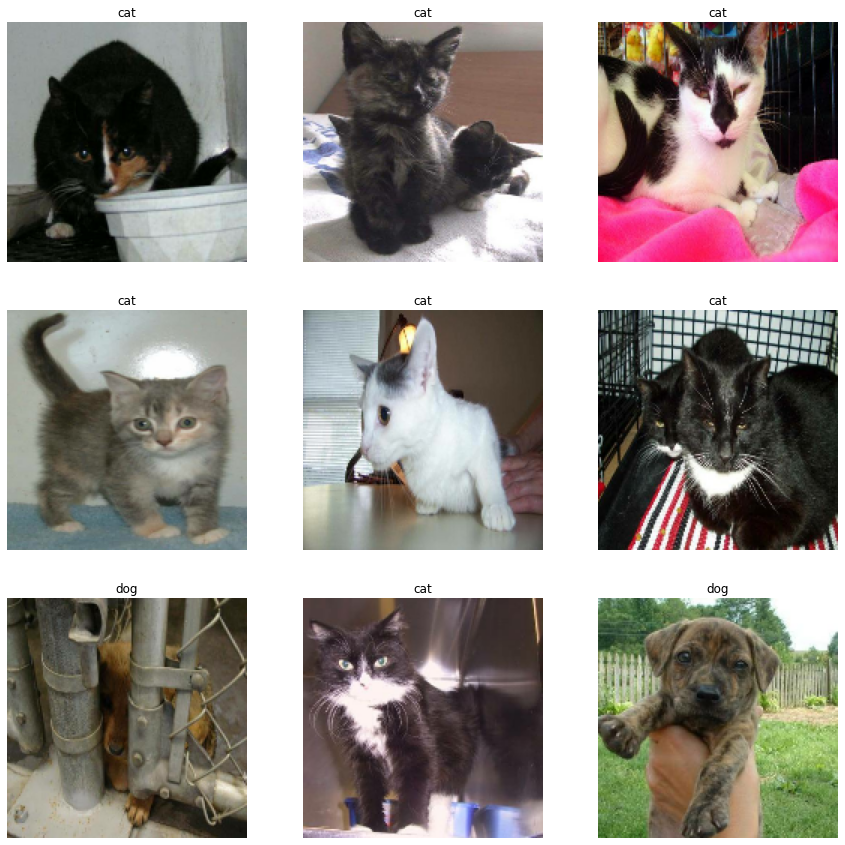

In [13]:
#Mostra as imagens do dataset de validation
plot_dataset(dataset_validation)

<Figure size 432x288 with 0 Axes>

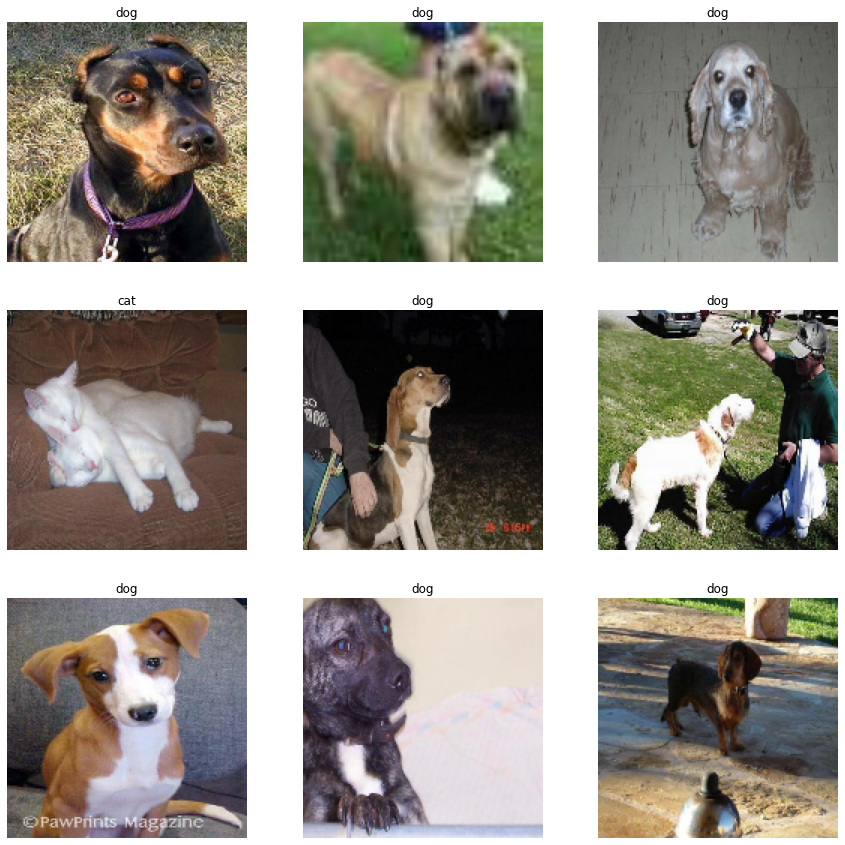

In [14]:
# Mostra as imagens de teste
plot_dataset(dataset_test)

In [15]:
#Criação da Rede Neural do Tipo Sequencial
#esta camada será criada uma após a outra de modo sequencial
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
    ),
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


#Função para Aprendizagem 
model.compile (
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    metrics = ['accuracy']
)

#Analisar o Resumo do Modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

In [16]:
# Histórico do modelo de treinamento

history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/20
63/63 [==============================] - 59s 918ms/step - loss: 0.1797 - accuracy: 0.5200 - val_loss: 0.1716 - val_accuracy: 0.5111
Epoch 2/20
63/63 [==============================] - 58s 912ms/step - loss: 0.1689 - accuracy: 0.5890 - val_loss: 0.1657 - val_accuracy: 0.5866
Epoch 3/20
63/63 [==============================] - 58s 916ms/step - loss: 0.1639 - accuracy: 0.6235 - val_loss: 0.1599 - val_accuracy: 0.6733
Epoch 4/20
63/63 [==============================] - 58s 917ms/step - loss: 0.1596 - accuracy: 0.6420 - val_loss: 0.1574 - val_accuracy: 0.6609
Epoch 5/20
63/63 [==============================] - 58s 918ms/step - loss: 0.1521 - accuracy: 0.6820 - val_loss: 0.1543 - val_accuracy: 0.6782
Epoch 6/20
63/63 [==============================] - 58s 917ms/step - loss: 0.1450 - accuracy: 0.7100 - val_loss: 0.1503 - val_accuracy: 0.6968
Epoch 7/20
63/63 [==============================] - 58s 924ms/step - loss: 0.1392 - accuracy: 0.7310 - val_loss: 0.1467 - val_accuracy: 0.7153

In [17]:
#Avaliação da Qualidade do Modelo Aplicadas ao Método de Validação e Treinamento
def plot_model():
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs) 

  plt.gcf().clear()
  plt.figure(figsize = (15,8))

  plt.subplot(1, 2, 1)
  plt.title('Training and Validation Accuracy')
  plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
  plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')

  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(epochs_range, loss, label = 'Training Loss')
  plt.plot(epochs_range, val_loss, label = 'Validation Loss')
  plt.legend(loc = 'lower right')

  plt.show()

<Figure size 432x288 with 0 Axes>

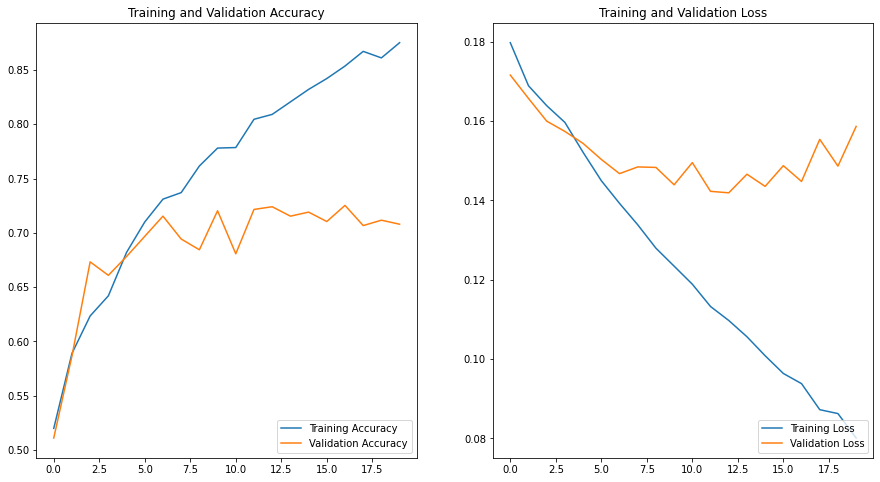

In [18]:
#Mostra a execução da Qualidade do Modelo
plot_model( )

In [19]:
# Análise de testes predictions do qual a rede neural desconhece
def plot_dataset_predictions(dataset):
  features, labels = dataset.as_numpy_iterator().next()

  predictions = model.predict_on_batch(features).flatten()
  predictions = tf.where(predictions < 0.5, 0, 1)

  print ('Labels:      %s' % labels)
  print ('Predictions: %s' % predictions.numpy())

  plt.gcf().clear()
  plt.figure(figsize = (15,15))

  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')

    plt.imshow(features[i].astype('uint8'))
    plt.title(class_names[predictions[i]])




                         



Labels:      [1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1]
Predictions: [0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1]


<Figure size 432x288 with 0 Axes>

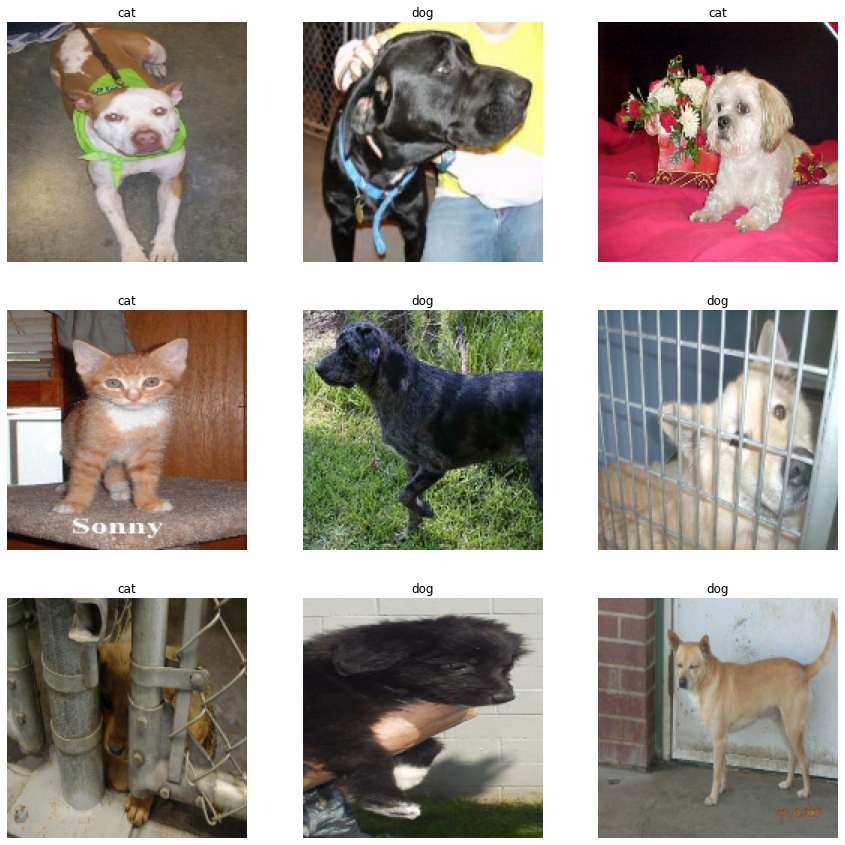

In [20]:
#Mostra do dataset de test predictions
plot_dataset_predictions(dataset_test)


In [21]:
#Avaliação da Qualidade do Modelo Aplicadas ao Método de Validação e Treinamento
# Do lado esquerdo está plotado o avanço da precisão tanto para o dataset de treinamento quanto para o dataset de validação
# Existe uma disparidade muito grande para o dataset de treinamento quanto para disparidade de validação
# E do lado direito está plotado as perdas da precisão
# Existe uma disparidade muito grande o cálculo de erro entre o dataset de treinamento quanto para disparidade de validação
# Over feeling ocorre quando o modelo ele treina muito bem, porém para casos que desconhece ele apresenta várias falhas 
# e para corrigir deve-se aumentar a quantidade de parâmetros e acrescentar dropout (desliga parâmetros durante a fase de treinamento)


#Alteração da etapa Criação da Rede Neural do Tipo Sequencial
#nas camadas convolucionais e dense

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
    ),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


#Função para Aprendizagem 
model.compile (
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    metrics = ['accuracy']
)

#Analisar o Resumo do Modelo
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 80, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)      

In [22]:
#  Outra técnica para evitar o over feeling chama-se data augmentation - realizar rotação horizontal e zoom
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])




In [23]:
# Criação de função para o dataset augmentation
def plot_dataset_augmentation(dataset):
  plt.gcf().clear()
  plt.figure(figsize= (15,15))

  for features, _ in dataset.take(1):
    feature = features[0]

    for i in range(9):

      feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

      plt.subplot(3, 3, i + 1)
      plt.axis ('off')

      plt.imshow(feature_data_augmentation[0]) / image_color_channel_size



In [25]:
#Técnica de transfer learning utilizando o modelo do tensorflow sem que haja alteração de parâmetros e pode ser aplicado em dispositivos móveis. 

model_transfer_learning = tf.keras.applications.MobileNetV2(
    input_shape = image_shape,
    include_top = False,
    weights = 'imagenet'
)

model_transfer_learning.trainable = False

model_transfer_learning.summary()




9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [27]:
#Etapa Finalizacao do Modelo : Salvar e Encaminhar para Produção
model.save('path/to/model')

In [28]:
#Etapa final Carregar o modelo
model = tf.keras.models.load_model('path/to/model')